# Affinity Propagation

creates clusters by sending messages between pairs of samples until convergence. <br>
A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples.<br>

https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation



In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_clientes = pd.read_csv("../data/processados/clientes.csv")

In [3]:
df_clientes.columns

Index(['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento',
       'PerfilInvestidor', 'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'ScoreRisco', 'P_investidor',
       'b_renda_mensal', 'b_idade', 'tempo_dinheiro_inves', 'resgate_dia',
       'inves_renda_mensal', 'possivel_renda_investida_mes'],
      dtype='object')

In [4]:
df_ml = df_clientes[['P_investidor', 'b_renda_mensal',
                    'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal']]

In [5]:
df_ml.head()

,P_investidor,b_renda_mensal,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal
0,conservador,"(-50.0, 10000.0]",1_ano,30,10
1,conservador,"(-50.0, 10000.0]",inder,0,20
2,conservador,"(-50.0, 10000.0]",inder,100,10
3,moderado,"(-50.0, 10000.0]",1_a_5_anos,0,50
4,conservador,"(-50.0, 10000.0]",1_a_5_anos,50,10


In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

P_investidor            0
b_renda_mensal          0
tempo_dinheiro_inves    0
resgate_dia             0
inves_renda_mensal      0
dtype: int64

In [8]:
df_ml.shape

(13331, 5)

In [9]:
cluster_model = ClusterModel(df_ml)

In [10]:
df_cluster, model, cluster_centers_indices, labels, n_clusters= cluster_model.affinity_propagation()

Did not converge


/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [11]:
pickle.dump(model, open(f'../models/affinity_prop_clientes_{dt.datetime.now()}.pkl','wb'))

In [12]:
n_clusters

0

In [13]:
df_cluster.to_csv(f'../data/processados/affinity_{dt.datetime.now()}.csv', index= False)

In [14]:
# df_cluster = pd.read_csv('../data/processados/affinity.csv')

In [56]:
df_cluster['cluster'].value_counts()

219    304
3      298
32     279
4      276
48     275
      ... 
127      1
52       1
201      1
99       1
146      1
Name: cluster, Length: 230, dtype: int64

## CLUSTER 391

In [18]:
cl_391 = df_cluster.query('cluster == 391')

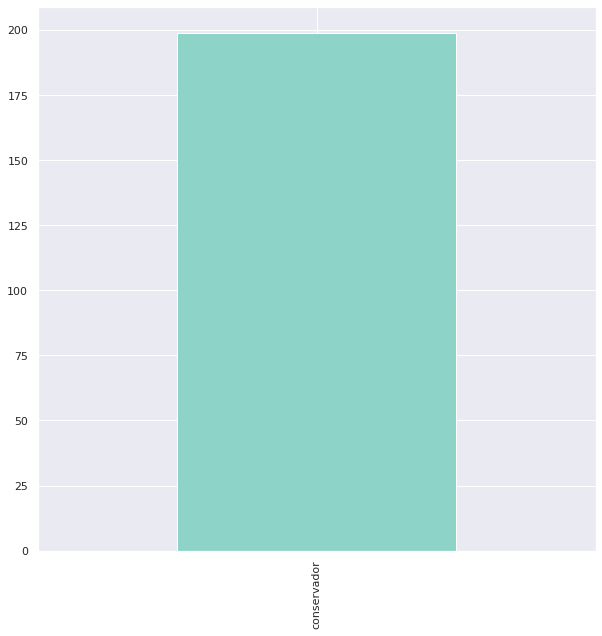

In [19]:
plt.figure(figsize=(10,10))
cl_391['P_investidor'].value_counts().plot(kind='bar')

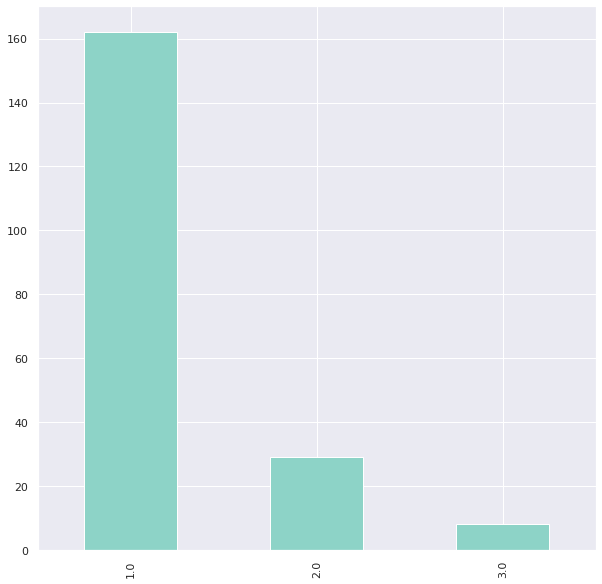

In [20]:
plt.figure(figsize=(10,10))
cl_391['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

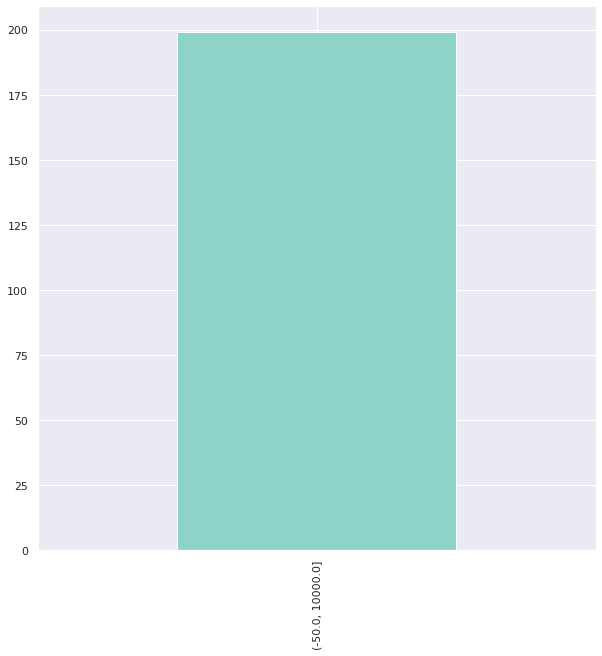

In [21]:
plt.figure(figsize=(10,10))
cl_391['b_renda_mensal'].value_counts().plot(kind='bar')

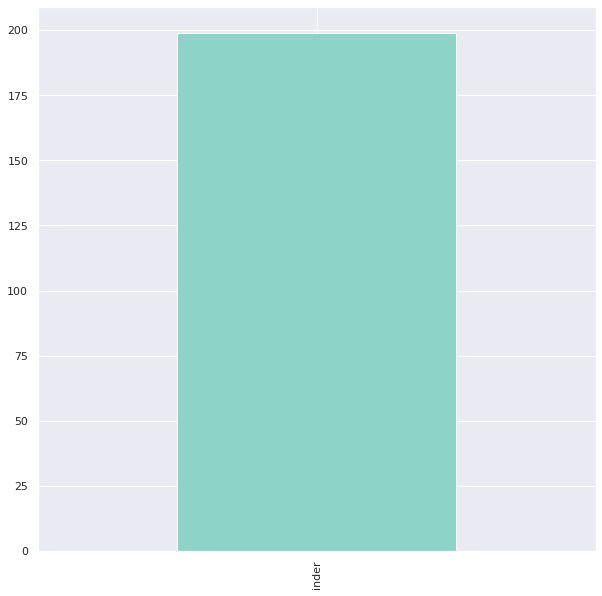

In [22]:
plt.figure(figsize=(10,10))
cl_391['tempo_dinheiro_inves'].value_counts().plot(kind='bar')

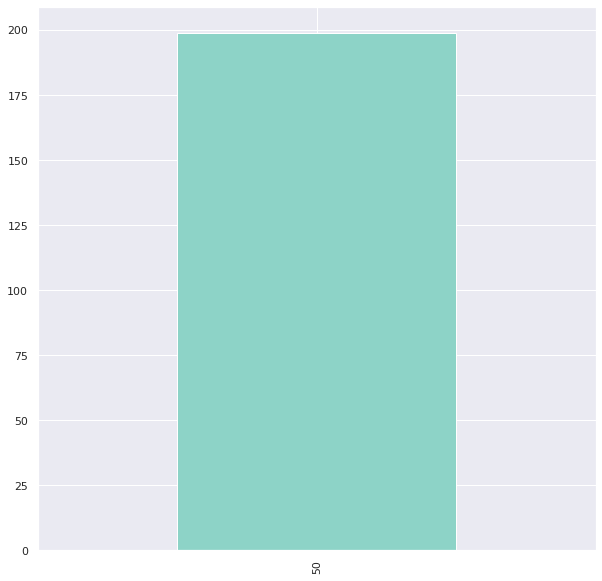

In [23]:
plt.figure(figsize=(10,10))
cl_391['resgate_dia'].value_counts().plot(kind='bar')

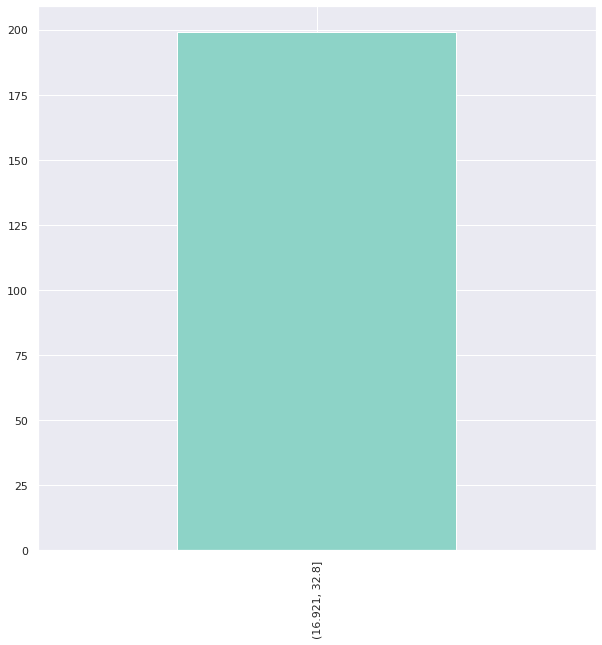

In [24]:
plt.figure(figsize=(10,10))
cl_391['b_idade'].value_counts().plot(kind='bar')

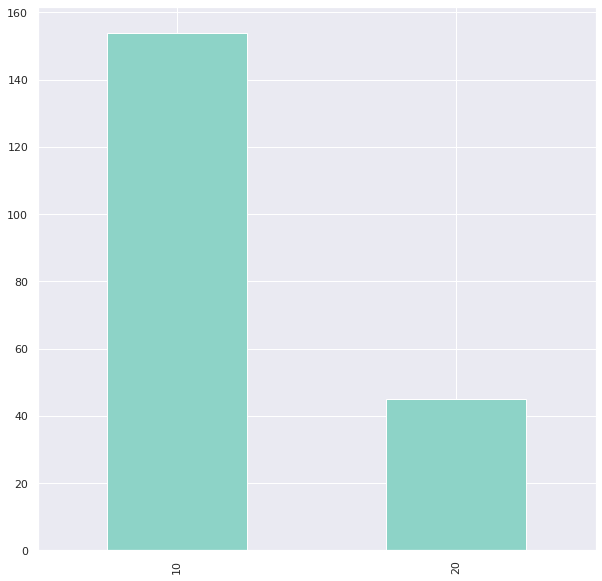

In [25]:
plt.figure(figsize=(10,10))
cl_391['inves_renda_mensal'].value_counts().plot(kind='bar')

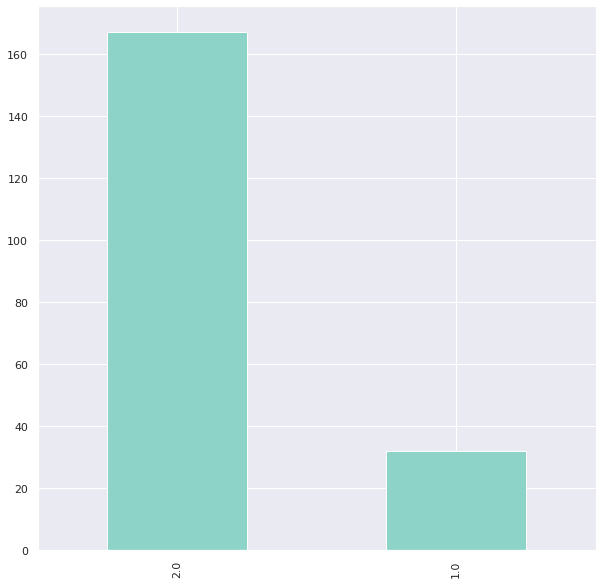

In [26]:
plt.figure(figsize=(10,10))
cl_391['ScoreObjetivos'].value_counts().plot(kind='bar')

## CLUSTER 73

In [16]:
cl_73 = df_cluster.query('cluster == 73')

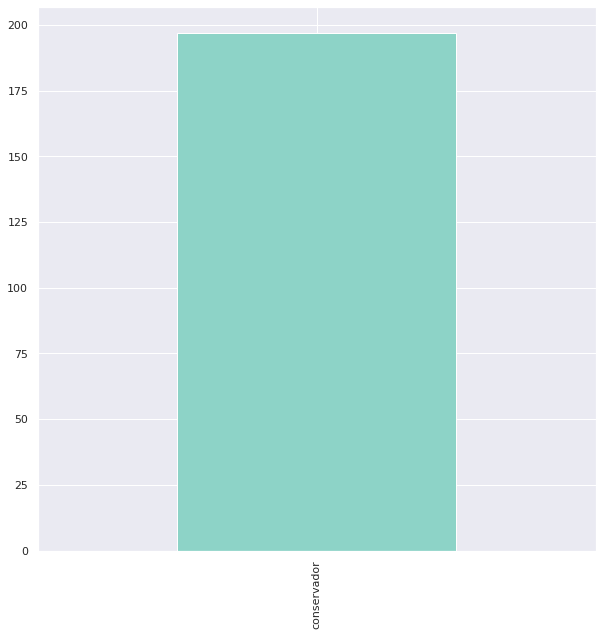

In [17]:
plt.figure(figsize=(10,10))
cl_73['P_investidor'].value_counts().plot(kind='bar')

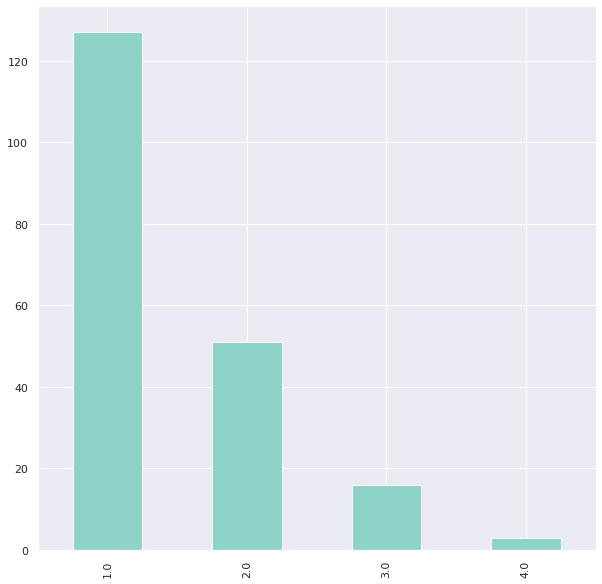

In [27]:
plt.figure(figsize=(10,10))
cl_73['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

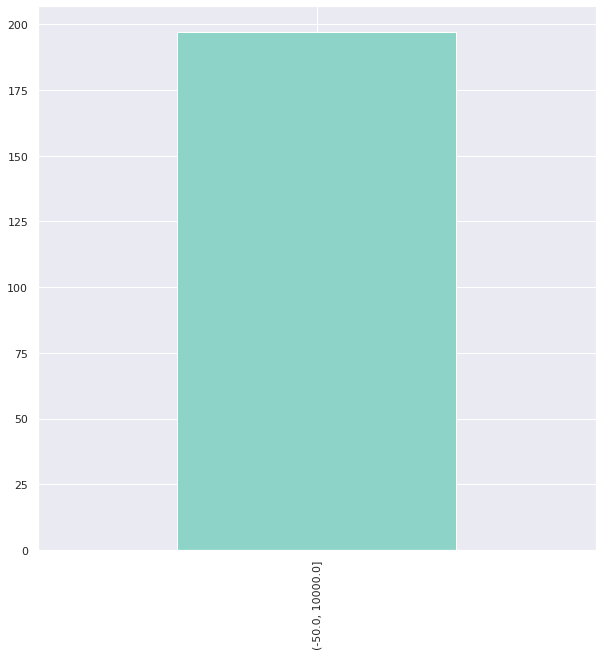

In [28]:
plt.figure(figsize=(10,10))
cl_73['b_renda_mensal'].value_counts().plot(kind='bar')

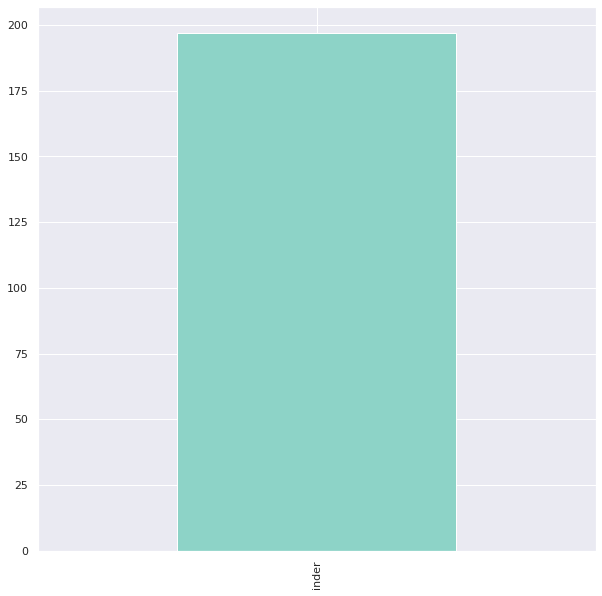

In [29]:
plt.figure(figsize=(10,10))
cl_73['tempo_dinheiro_inves'].value_counts().plot(kind='bar')

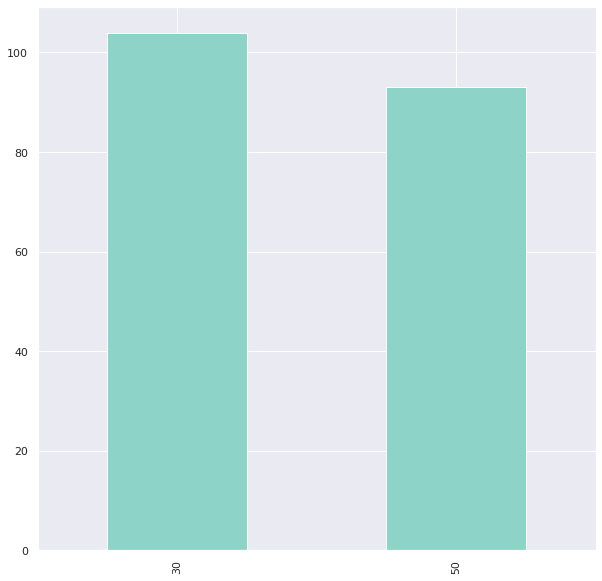

In [30]:
plt.figure(figsize=(10,10))
cl_73['resgate_dia'].value_counts().plot(kind='bar')

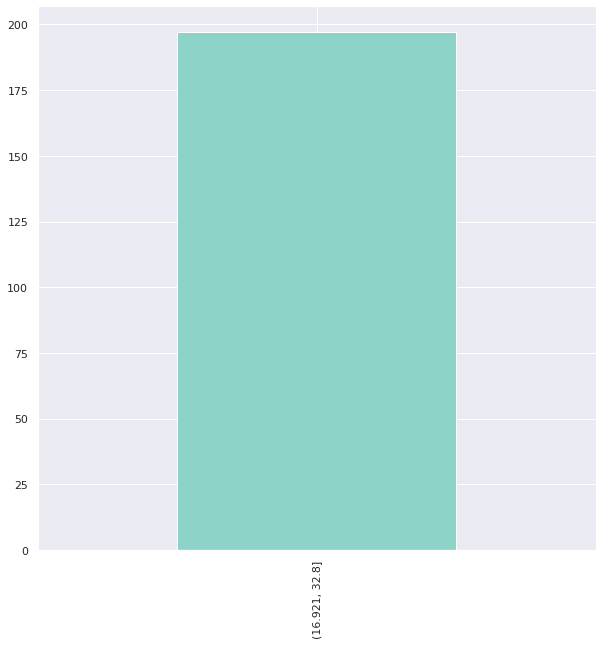

In [31]:
plt.figure(figsize=(10,10))
cl_73['b_idade'].value_counts().plot(kind='bar')

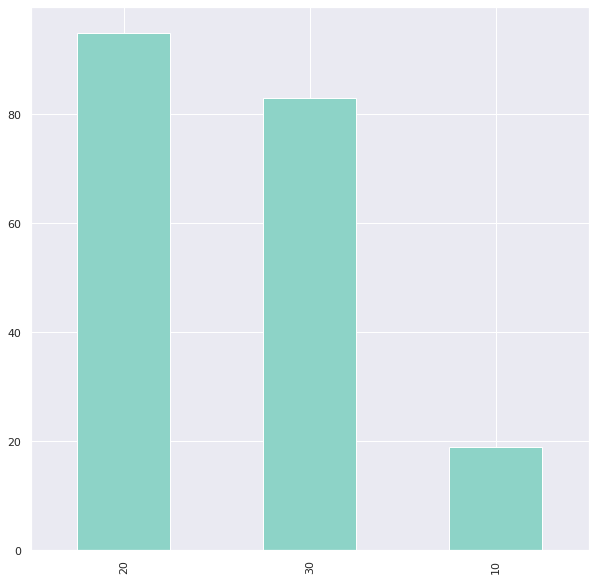

In [34]:
plt.figure(figsize=(10,10))
cl_73['inves_renda_mensal'].value_counts().plot(kind='bar')

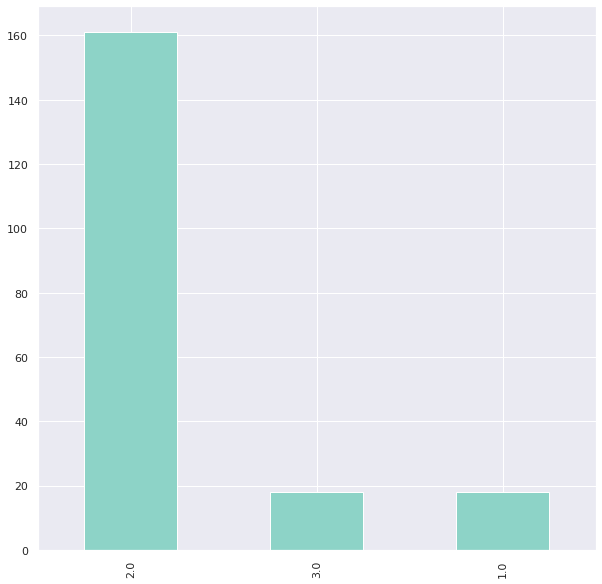

In [35]:
plt.figure(figsize=(10,10))
cl_73['ScoreObjetivos'].value_counts().plot(kind='bar')

## CLUSTER 354

In [39]:
cl_354 = df_cluster.query('cluster == 354')

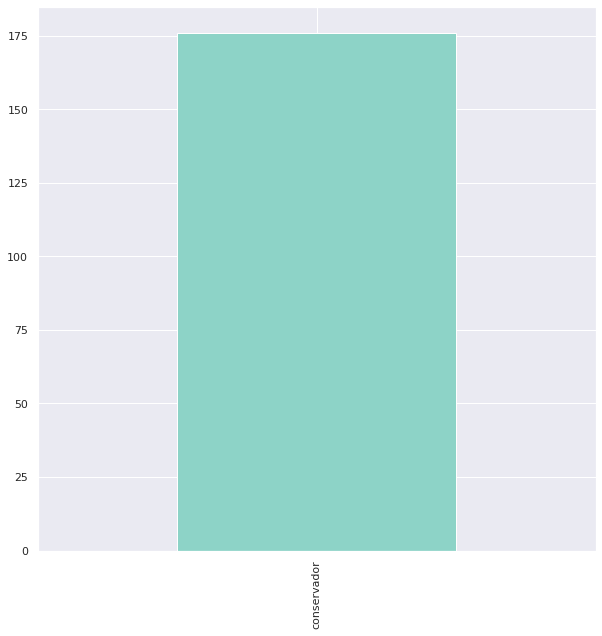

In [40]:
plt.figure(figsize=(10,10))
cl_354['P_investidor'].value_counts().plot(kind='bar')

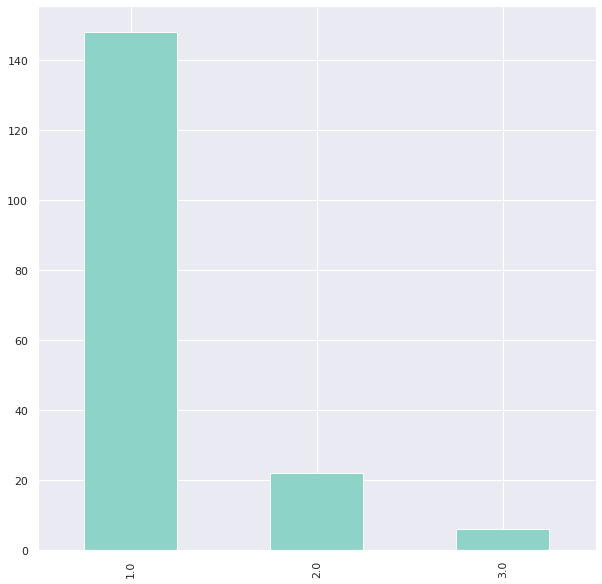

In [41]:
plt.figure(figsize=(10,10))
cl_354['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

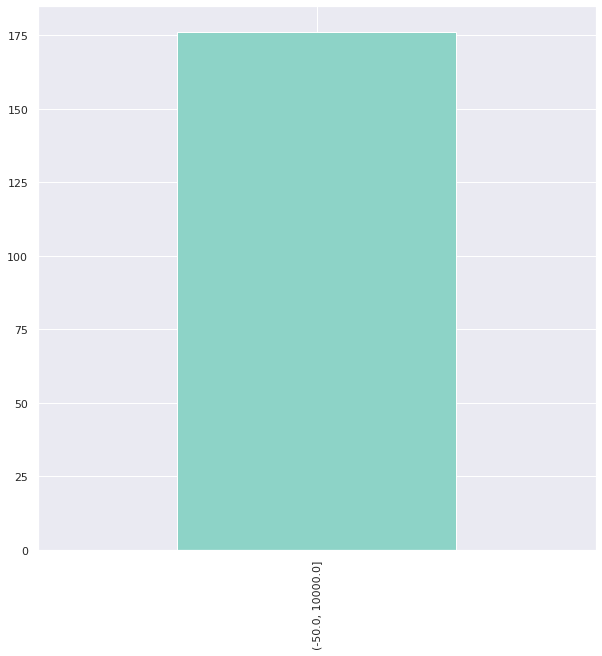

In [42]:
plt.figure(figsize=(10,10))
cl_354['b_renda_mensal'].value_counts().plot(kind='bar')

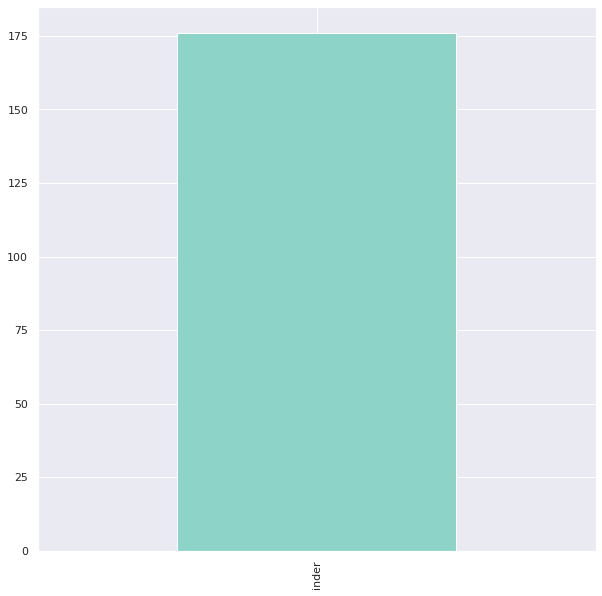

In [43]:
plt.figure(figsize=(10,10))
cl_354['tempo_dinheiro_inves'].value_counts().plot(kind='bar')

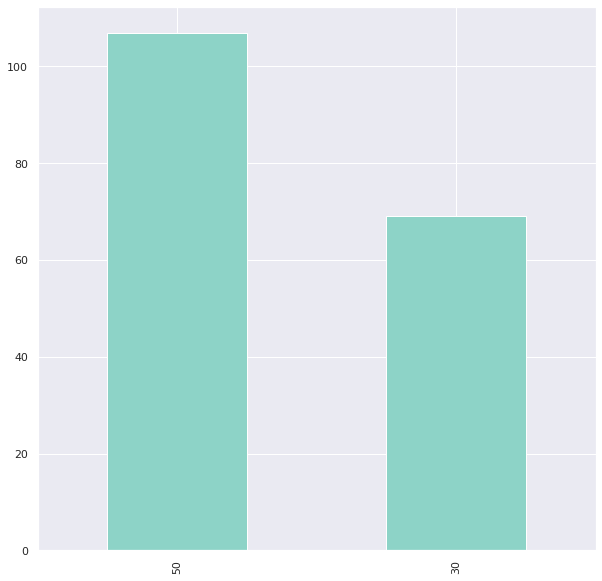

In [44]:
plt.figure(figsize=(10,10))
cl_354['resgate_dia'].value_counts().plot(kind='bar')

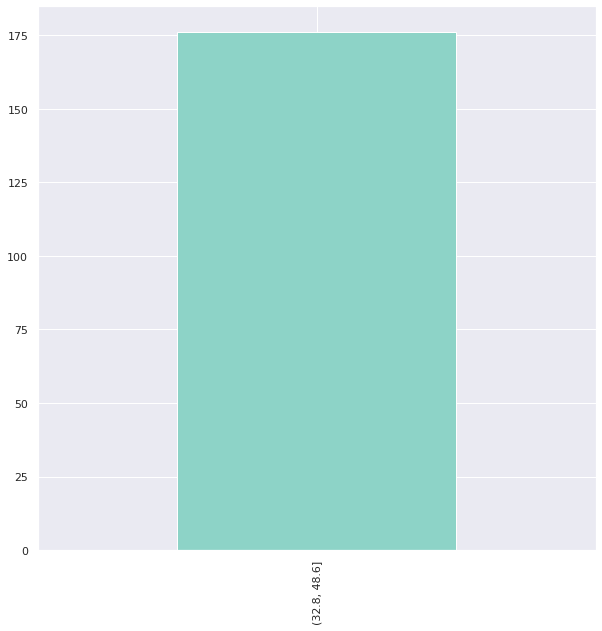

In [45]:
plt.figure(figsize=(10,10))
cl_354['b_idade'].value_counts().plot(kind='bar')

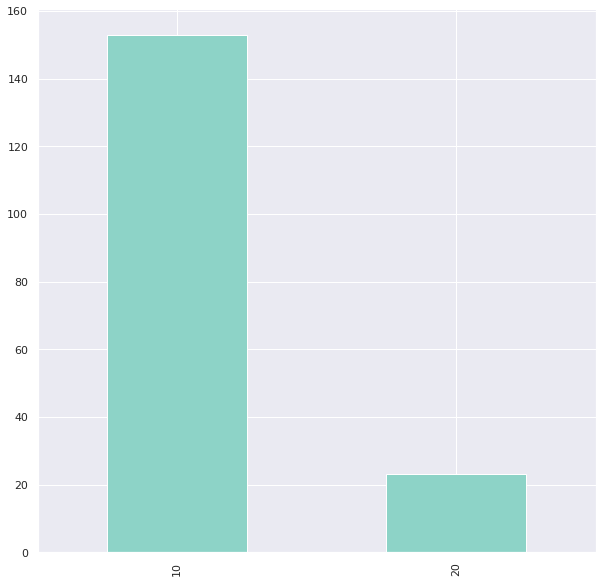

In [46]:
plt.figure(figsize=(10,10))
cl_354['inves_renda_mensal'].value_counts().plot(kind='bar')

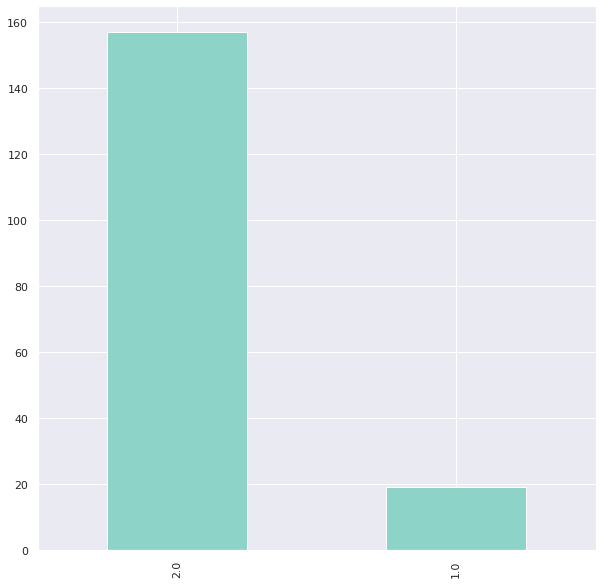

In [47]:
plt.figure(figsize=(10,10))
cl_354['ScoreObjetivos'].value_counts().plot(kind='bar')